In [1]:
# Connect Google Drive and Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import python libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Flight Price

In [3]:
# Import excel data set by using pandas
df = pd.read_excel("/content/drive/MyDrive/Data_Train.xlsx")
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
# Get an information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# change Total_Stops to float type
stop_dict = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4,
    '5 stops': 5
}

df['Total_Stops'] = df['Total_Stops'].map(stop_dict)

In [7]:
# Create new columns called "duration_minuutes" from "Duration columns"
def convert_duration(Duration):
  hours = 0
  minutes = 0
  for i in Duration.split():
    if 'h' in i:
      hours = int(i[:-1])
    if 'm' in i:
      minutes = int(i[:-1])
    time_delta = datetime.timedelta(hours=hours, minutes=minutes)
  return time_delta.total_seconds()//60

df['duration_minutes'] = df['Duration'].apply(convert_duration)

In [8]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,170.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,445.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,1140.0


In [9]:
# check if this dataset has null
df.isnull().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         1
Additional_Info     0
Price               0
duration_minutes    0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
# Check it again
df.isnull().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Route               0
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
duration_minutes    0
dtype: int64

In [12]:
df.shape

(10682, 12)

In [13]:
# Drop "Route" "Additional_Info" "Duration" Columns
df = df.drop(['Route','Additional_Info', 'Duration'], axis=1)

In [14]:
# Create new columns named "Flight_month" and "Flight_day" from "Date_of_Journey"
Date_month_year = df['Date_of_Journey']
df['Flight_month'] = pd.to_datetime(Date_month_year, format="%d/%m/%Y").dt.month
df['Flight_day'] = pd.to_datetime(Date_month_year, format="%d/%m/%Y").dt.day

In [15]:
# Drop "Date_of_Destination" columns
df = df.drop(['Date_of_Journey'], axis=1)

In [16]:
# Change data type to category
df['Flight_day'] = df['Flight_day'].astype('category')
df['Flight_month'] = df['Flight_month'].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Airline           10682 non-null  object  
 1   Source            10682 non-null  object  
 2   Destination       10682 non-null  object  
 3   Dep_Time          10682 non-null  object  
 4   Arrival_Time      10682 non-null  object  
 5   Total_Stops       10682 non-null  float64 
 6   Price             10682 non-null  int64   
 7   duration_minutes  10682 non-null  float64 
 8   Flight_month      10682 non-null  category
 9   Flight_day        10682 non-null  category
dtypes: category(2), float64(2), int64(1), object(5)
memory usage: 772.5+ KB


In [18]:
df.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,duration_minutes,Flight_month,Flight_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,0.0,3897,170.0,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,2.0,7662,445.0,5,1
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2.0,13882,1140.0,6,9


# Descriptive Statistics

In [19]:
# Check and see descriptive statistics
df.describe()

,Total_Stops,Price,duration_minutes
count,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,643.020502
std,0.675229,4611.548810,507.830133
min,0.000000,1759.000000,5.000000
25%,0.000000,5277.000000,170.000000
50%,1.000000,8372.000000,520.000000
75%,1.000000,12373.000000,930.000000
max,4.000000,79512.000000,2860.000000


In [20]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [21]:
df['Total_Stops'].value_counts()

1.0    5625
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: Total_Stops, dtype: int64

array([[<Axes: title={'center': 'Total_Stops'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'duration_minutes'}>, <Axes: >]],
      dtype=object)

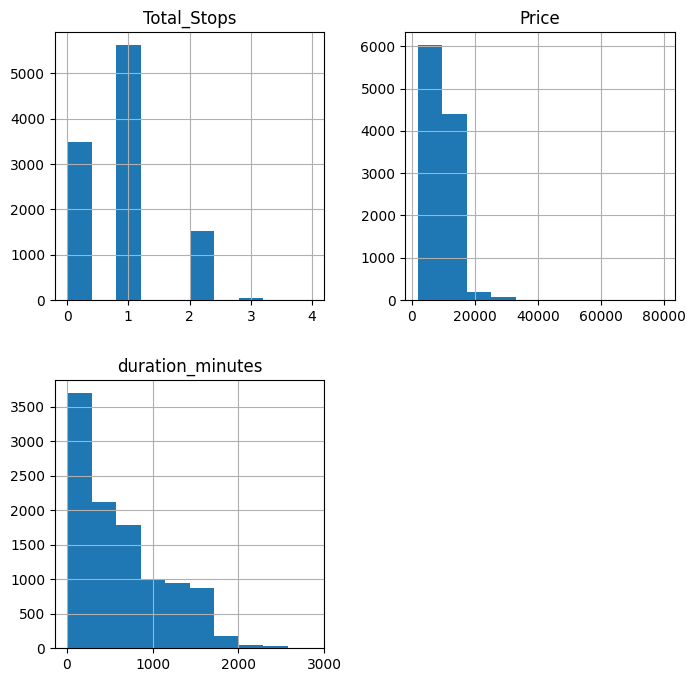

In [22]:
# Create histograms
df.hist(figsize=(8,8))

# Univariate Visualization

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64


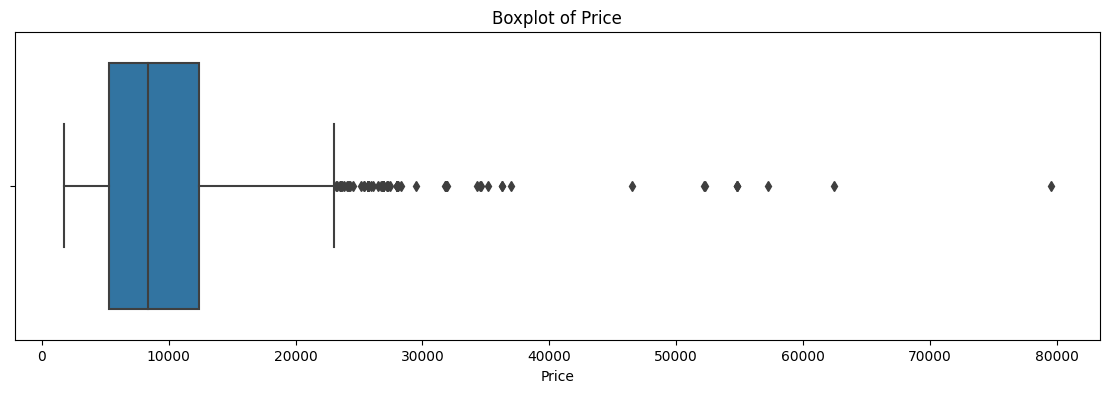

In [23]:
# Price
print(df['Price'].describe())
# ------------------------------
plt.figure(figsize=(14, 4))
sns.boxplot(x=df['Price'])
plt.xlabel("Price")
plt.title("Boxplot of Price")
plt.show()

<Axes: >

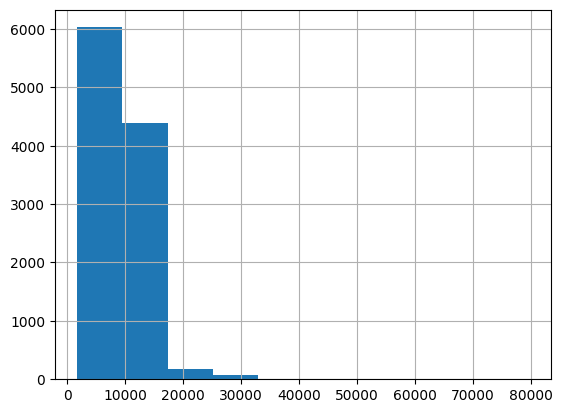

In [24]:
df['Price'].hist()

# Correlation Matrix

In [25]:
corr_matrix = df.corr()

<ipython-input-25-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [26]:
print(corr_matrix)

                  Total_Stops     Price  duration_minutes
Total_Stops          1.000000  0.603897          0.738071
Price                0.603897  1.000000          0.506480
duration_minutes     0.738071  0.506480          1.000000


<ipython-input-27-e420122115cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

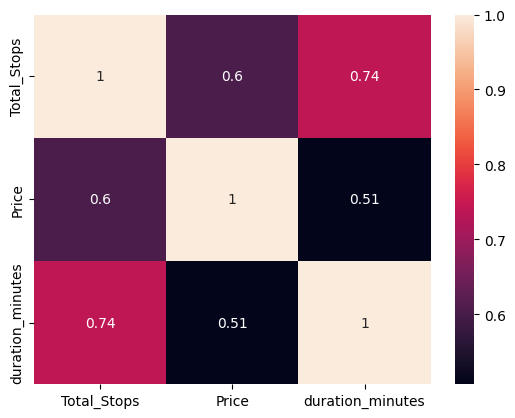

In [27]:
# Create a heatmap
sns.heatmap(df.corr(), annot=True)

In [28]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

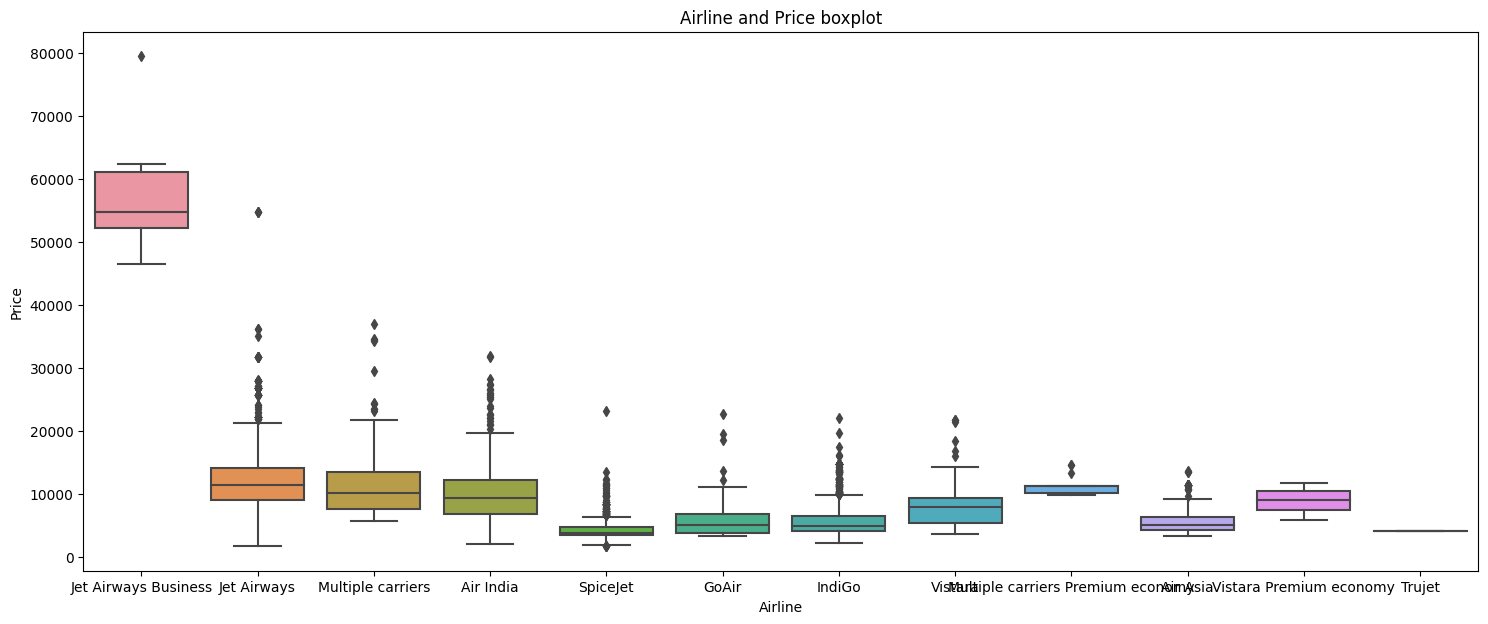

In [29]:
# Create a boxplot showing Airline vs Price
fig, ax = plt.subplots(figsize=(18, 7))
sns.boxplot(x='Airline', y="Price", data=df.sort_values("Price",ascending=False), ax=ax)
ax.set_title("Airline and Price boxplot")
ax.set_xlabel("Airline")
ax.set_ylabel("Price")
plt.show()

In [30]:
# convert "Airline" column to dummy vsriable
AirLine = df[['Airline']]
AirLine = pd.get_dummies(AirLine, drop_first=True)
AirLine = AirLine.astype(float)
AirLine.head(5)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


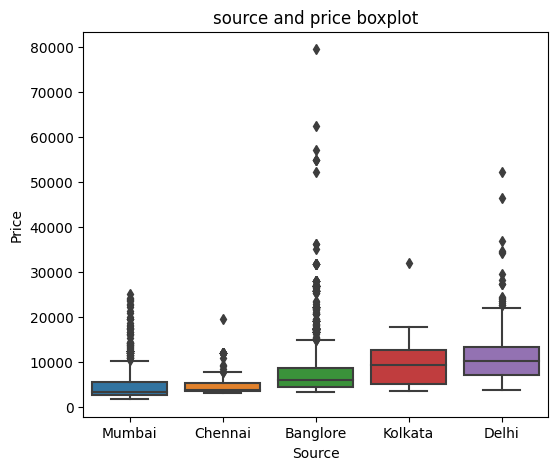

In [31]:
# Create a boxplot showing Source vs Price
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(x='Source', y='Price', data=df.sort_values("Price"), ax=ax)
ax.set_title("source and price boxplot")
ax.set_xlabel("Source")
ax.set_ylabel("Price")
plt.show()

In [32]:
# convert "Source" column to dummy vsriable
Source = df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source = Source.astype(float)
Source.head(5)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0


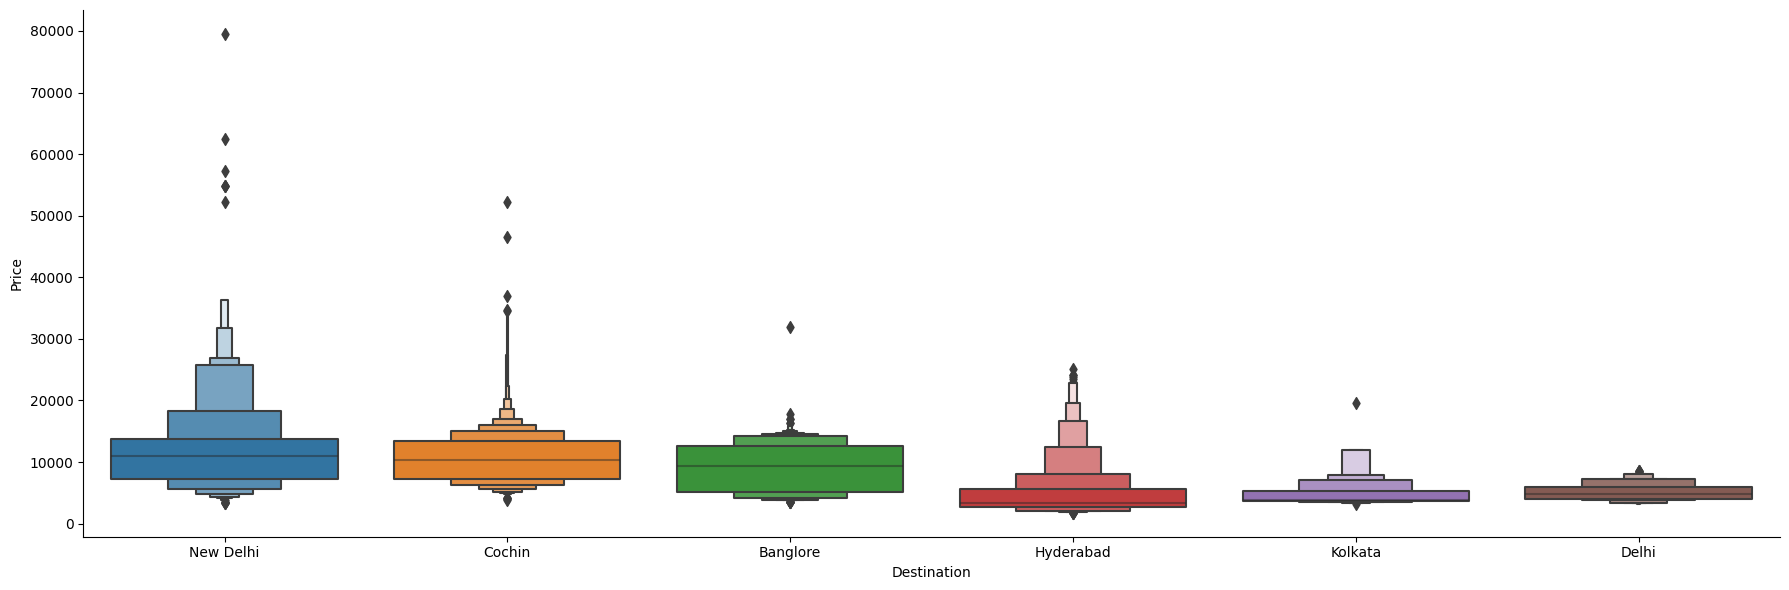

In [33]:
# Create a boxplot that shows Destination and Price
sns.catplot(x='Destination', y='Price', data=df.sort_values("Price", ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [34]:
# convert "Destination" column to dummy vsriable
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.astype(float)
Destination.head(5)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [35]:
# Merge three new columns "Airline", "Source", "Destination"
df = pd.concat([df, AirLine, Source, Destination], axis=1)

In [36]:
df.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,duration_minutes,Flight_month,Flight_day,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,0.0,3897,170.0,3,24,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
1,Air India,Kolkata,Banglore,05:50,13:15,2.0,7662,445.0,5,1,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2.0,13882,1140.0,6,9,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,18:05,23:30,1.0,6218,325.0,5,12,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,16:50,21:35,1.0,13302,285.0,3,1,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1


In [37]:
# Drop three columns "Airline", "Source", "Destination"
df.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [38]:
# chack dataset
df.head(5)

,Dep_Time,Arrival_Time,Total_Stops,Price,duration_minutes,Flight_month,Flight_day,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,22:20,01:10 22 Mar,0.0,3897,170.0,3,24,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
1,05:50,13:15,2.0,7662,445.0,5,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0
2,09:25,04:25 10 Jun,2.0,13882,1140.0,6,9,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0
3,18:05,23:30,1.0,6218,325.0,5,12,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0
4,16:50,21:35,1.0,13302,285.0,3,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1


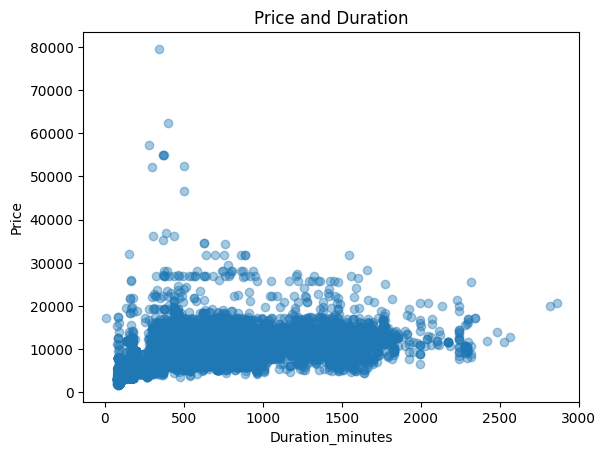

In [39]:
# create a scatterplot of price and duration minutes
X = df['duration_minutes']
Y = df['Price']
plt.scatter(X, Y, alpha=0.4)
plt.xlabel("Duration_minutes")
plt.ylabel("Price")
plt.title("Price and Duration")
plt.show()

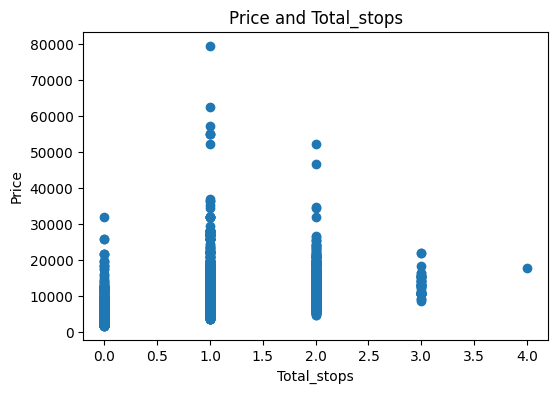

In [40]:
# create scatterplot of "Price and Total_stops"
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(df['Total_Stops'], df['Price'])
plt.xlabel('Total_stops')
plt.ylabel('Price')
plt.title("Price and Total_stops")
plt.show()

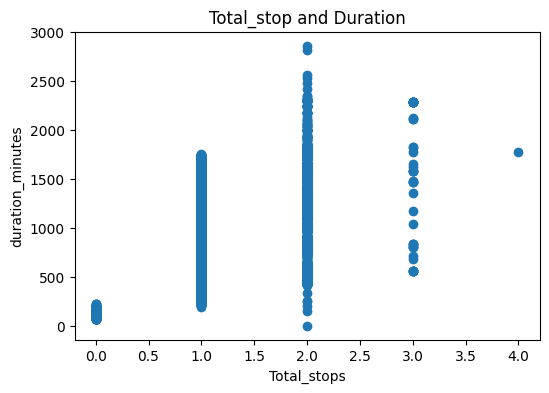

In [41]:
# create scatterplot of "duration_minutes and Total_Stops"
fig, ax = plt.subplots(figsize=(6, 4))
plt.scatter(df['Total_Stops'], df['duration_minutes'])
plt.xlabel('Total_stops')
plt.ylabel('duration_minutes')
plt.title("Total_stop and Duration")
plt.show()

 # Build Regresssion Model
 Price and duration_minutes

In [42]:
regression = linear_model.LinearRegression()

In [43]:
# Set X & Y value
X = df['duration_minutes']
Y = df['Price']

In [44]:
# check shape of X and Y value
xshape = np.shape(X)
yshape = np.shape(Y)
print(xshape)
print(yshape)

(10682,)
(10682,)


In [45]:
X = pd.Series(X)
Y = pd.Series(Y)

In [46]:
# Convert Series to Numpy array
X = np.array(X)
Y = np.array(Y)

In [47]:
# Reshape Numpy array to 2D array
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [48]:
regression.fit(X, Y)

LinearRegression()

In [49]:
df['Predicted_price'] = regression.predict(X)

In [50]:
df.head(5)

,Dep_Time,Arrival_Time,Total_Stops,Price,duration_minutes,Flight_month,Flight_day,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Predicted_price
0,22:20,01:10 22 Mar,0.0,3897,170.0,3,24,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,6911.657885
1,05:50,13:15,2.0,7662,445.0,5,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,8176.461599
2,09:25,04:25 10 Jun,2.0,13882,1140.0,6,9,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1,0,0,0,0,11372.965531
3,18:05,23:30,1.0,6218,325.0,5,12,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,7624.547251
4,16:50,21:35,1.0,13302,285.0,3,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,7440.575802


In [51]:
regression.coef_.tolist()

[[4.599286233202631]]

In [52]:
# find an intercept of regression model
regression.intercept_

array([6129.77922506])

In [53]:
from matplotlib.transforms import CompositeAffine2D
intercept = regression.intercept_
coefficients = regression.coef_
print(coefficients)

[[4.59928623]]


In [54]:
score1 = regression.score(X,Y)
print(f"score of Regeression model1 is {score1}")

score of Regeression model1 is 0.25652174887276213


# Bulid Regression Model 2

In [55]:
regression = linear_model.LinearRegression()

In [56]:
X = df['Total_Stops']
Y = df['Price']

Changed 1D to 2D by using pandas series, numpy and reshape

In [57]:
X = pd.Series(X)
Y = pd.Series(Y)

In [58]:
X = np.array(X)
Y = np.array(Y)

In [59]:
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

In [60]:
regression.fit(X, Y)

LinearRegression()

In [61]:
df['Predicted_price2'] = regression.predict(X)

In [62]:
df.head(5)

,Dep_Time,Arrival_Time,Total_Stops,Price,duration_minutes,Flight_month,Flight_day,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Predicted_price,Predicted_price2
0,22:20,01:10 22 Mar,0.0,3897,170.0,3,24,0.0,0.0,1.0,...,0.0,0.0,0.0,0,0,0,0,1,6911.657885,5687.940607
1,05:50,13:15,2.0,7662,445.0,5,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0,0,0,0,0,8176.461599,13936.701269
2,09:25,04:25 10 Jun,2.0,13882,1140.0,6,9,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,0,0,0,11372.965531,13936.701269
3,18:05,23:30,1.0,6218,325.0,5,12,0.0,0.0,1.0,...,0.0,1.0,0.0,0,0,0,0,0,7624.547251,9812.320938
4,16:50,21:35,1.0,13302,285.0,3,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0,0,0,0,1,7440.575802,9812.320938


In [63]:
regression.coef_.tolist()

[[4124.380331143414]]

In [64]:
# find an intercept of regression model
regression.intercept_

array([5687.94060706])

In [65]:
score2 = regression.score(X,Y)
print(f'Score of Regression model2 is {score2}')

Score of Regression model2 is 0.3646914764663134


# Remove Outlier to Improve Scores

In [66]:
df = df[df['duration_minutes'] < 2000]

In [67]:
df.shape

(10599, 29)

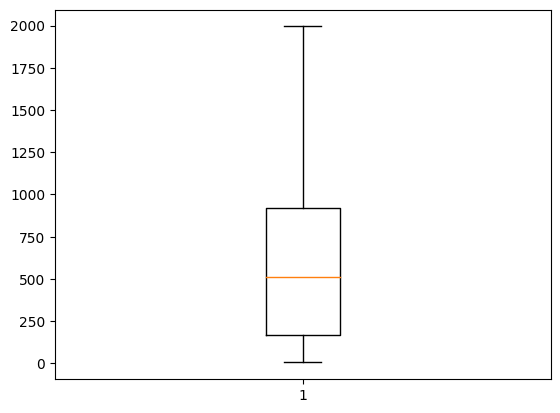

In [68]:
plt.boxplot(x=df['duration_minutes'])
plt.show()

# Rebuilt Regression Model

In [69]:
# Define Feature value and Target Variable
X = df[['duration_minutes', 'Total_Stops']]
Y = df['Price']

In [70]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [71]:
# Built Regression Model
regression = LinearRegression()

In [72]:
regression.fit(X, Y)

LinearRegression()

In [73]:
regression.coef_.tolist()

[1.3684490724204532, 3457.5505331138984]

In [74]:
regression.intercept_

5383.815863968609

In [75]:
intercept = regression.intercept_
coefficients = regression.coef_
print(coefficients)

[1.36844907e+00 3.45755053e+03]


In [76]:
regression.score(X,Y)

0.37672478236664386

In [77]:
# Valuate the Model
y_predict = regression.predict(X_test)
MSE = mean_squared_error(Y_test, y_predict)
R2 = r2_score(Y_test, y_predict)

In [78]:
print(f"Mean Square Error is {MSE}")

Mean Square Error is 11289670.092968825


In [79]:
print(f"Coefficiant of Determination = R^2 is {R2}")

Coefficiant of Determination = R^2 is 0.42216785944543134


In [80]:
print("Price =", intercept, end="")
for feature, coef in zip(X.columns, coefficients):
    print(f" + {coef} * {feature}", end="")

Price = 5383.815863968609 + 1.3684490724204532 * duration_minutes + 3457.5505331138984 * Total_Stops

# New Regression Models with some columns in X value
Create a Residual plot

In [81]:
X = df[['duration_minutes', 'Total_Stops', 'Airline_Air India',	'Airline_GoAir',	'Airline_IndiGo',	'Airline_Jet Airways',	'Airline_Jet Airways Business',	'Airline_Multiple carriers',	'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',	'Airline_Trujet',	'Airline_Vistara',	'Airline_Vistara Premium economy']]

In [82]:
Y = df['Price']

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [84]:
model = LinearRegression()

In [85]:
model.fit(X_train, Y_train)

LinearRegression()

In [86]:
y_pred = model.predict(X_test)
residuals = Y_test - y_pred

In [87]:
intercept = model.intercept_
coefficients = model.coef_

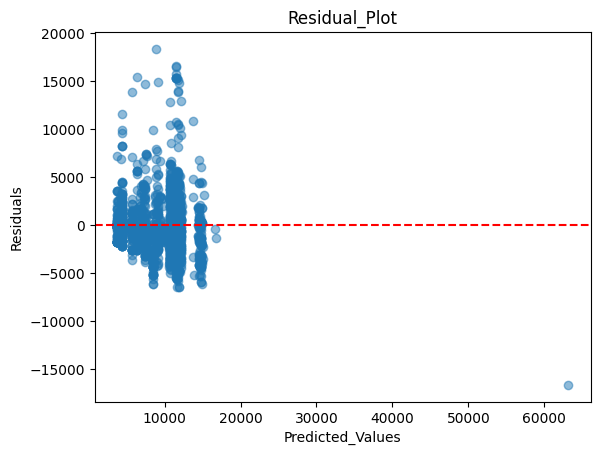

In [88]:
# Plot Residual Plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted_Values')
plt.ylabel('Residuals')
plt.title('Residual_Plot')
plt.show()

In [89]:
MSE = mean_squared_error(Y_test, y_predict)
R2 = r2_score(Y_test, y_predict)

In [90]:
print(MSE)

11289670.092968825


In [91]:
print(R2)

0.42216785944543134


In [92]:
print("Price =", intercept, end="")
for feature, coef in zip(X.columns, coefficients):
    print(f" + {coef} * {feature}", end="")

Price = 4048.1732847425674 + 0.31920688956134885 * duration_minutes + 2966.113021969754 * Total_Stops + 1631.6533643554158 * Airline_Air India + 164.79842414271963 * Airline_GoAir + 331.58194333234655 * Airline_IndiGo + 4341.351484784004 * Airline_Jet Airways + 53008.69978109237 * Airline_Jet Airways Business + 3556.8382263066715 * Airline_Multiple carriers + 4479.748305428754 * Airline_Multiple carriers Premium economy + -301.3632309673622 * Airline_SpiceJet + -2936.5316501784637 * Airline_Trujet + 2214.3173943993847 * Airline_Vistara + 4865.214992189535 * Airline_Vistara Premium economy

In [93]:
df.shape

(10599, 29)